<h1 align="center"> DATA130051 Project 1</h1>

<div align="center"> Notebook Playground for DATA130051 Project 1</div>

<div align="center"> Author: 21307130080 程子豪</div>

Homepage: https://github.com/football-prince/DATA130051_PJ1

# Introduction

## Dataset
The Fashion-MNIST dataset is available at <a href=https://pan.baidu.com/s/1HdFa950p0hYTjcYts5OxkA>here</a> with extracting password '**jomg**'.jomg

## Model
A trained model is available at the <a href =https://pan.baidu.com/s/1vM4CFfH0R3SmKgnA4nAvyA>cloud drive</a> 
with extracting password '**d7rd**'.

## Packages

Please run this module to ensure the project code runs correctly.

In [192]:
from Neural_Network import Network
from IPython.display import clear_output
from time import sleep
import numpy as np
import random
import matplotlib.pyplot as plt

# My Functions

This part is manually built neural networks, data readers, and visualization modules

In [193]:
from Neural_Network import Network
from Mnist_Data_Loader import MNISTDatasetLoader
from Plotter import plotter
from PCA import nnPCA   

# Loading Data

Place the folder obtained by extracting the "Fashion_Mnist_Dataset.rar" file in the same directory as "main.ipynb" to run it.

In [194]:
dataset_path = './Fashion_Mnist_Dataset'  # your data path

# build MNISTDatasetLoader class
loader = MNISTDatasetLoader(dataset_path)

# load dataset
loader.load_dataset()

data_x = loader.train_images
data_y1 = loader.train_labels
test_x = loader.test_images
test_y1 = loader.test_labels

In [195]:
# one hot
data_y = np.zeros((data_y1.size, 10))
test_y = np.zeros((test_y1.size, 10))
data_y[np.arange(data_y1.size), data_y1] = 1
test_y[np.arange(test_y1.size), test_y1] = 1

In [196]:
# Set random seed to ensure reproducibility
np.random.seed(2024)

# Get indices of all data
indices = np.arange(data_x.shape[0])
# Shuffle the indices
np.random.shuffle(indices)
# Split indices to obtain indices for training and validation sets
train_indices = indices[:50000]
valid_indices = indices[50000:]

# Use these indices to create training and validation sets
train_x = data_x[train_indices]
train_y = data_y[train_indices]
valid_x = data_x[valid_indices]
valid_y = data_y[valid_indices]

# Print the sizes of training and validation sets to confirm correct partitioning
print("Training set data shape:", train_x.shape)  # Expected to be (50000, 784)
print("Training set labels shape:", train_y.shape)  # Expected to be (50000, 10)
print("Validation set data shape:", valid_x.shape)  # Expected to be (10000, 784)
print("Validation set labels shape:", valid_y.shape)  # Expected to be (10000, 784)
print("Test set data shape:", test_x.shape)  # Expected to be (10000, 784)
print("Test set labels shape:", test_y.shape)  # Expected to be (10000, 784)

Training set data shape: (50000, 784)
Training set labels shape: (50000, 10)
Validation set data shape: (10000, 784)
Validation set labels shape: (10000, 10)
Test set data shape: (10000, 784)
Test set labels shape: (10000, 10)


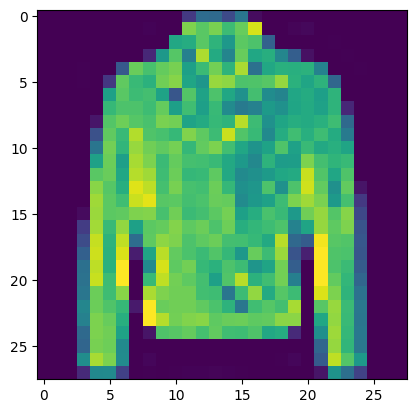

In [197]:
i=random.randint(0,49999)
imagedemo = train_x[i].reshape((28,28))
plt.imshow(imagedemo)

# Module

### Customizable Features of the Model

**1. Customizable Hidden Layer Sizes:**
   - The `__init__` method of the `Network` class allows for setting the sizes of the hidden layers through the `hidden_size` parameter. Users can specify the number of neurons in each layer of the network, providing flexibility in designing the network architecture according to the complexity of the task.

**2. Selectable Activation Functions:**
   - The model supports custom activation functions for each layer, specified via the `acts` parameter in the `__init__` method. This feature enables the use of different activation functions like ReLU, sigmoid, or linear for different layers, catering to various nonlinear transformations suited to the data.

**3. Gradient Calculation via Backpropagation:**
   - The `backprop` method implements the backpropagation algorithm, which is essential for training neural networks. It computes the gradient of the loss function with respect to the network's parameters, which is then used to update the weights and biases in the `update` method. This mechanism supports efficient learning by adjusting the model parameters in response to the error observed in the output.

These features enhance the model's adaptability and effectiveness, allowing it to be tailored to specific data sets and tasks, thereby improving learning outcomes.


In [198]:
# set up a neural network
np.random.seed(2024)
# nn = Network([784,10],['relu'], lr = 3e-2)
# nn = Network([784,500,10],['sigmoid','sigmoid'], lr = 3e-2)
nn = Network(hidden_size=[784, 256, 64, 10], acts=['relu', 'relu', 'sigmoid'],lr = 3e-2)

# if you want to load your model, use the code here
# nn = Network.load(r'best_model.txt')

# Training

### Implementation Details(in "Neural_Network.py")

**1. Stochastic Gradient Descent (SGD) Optimizer:**
   - The `update` method implements the SGD optimizer. It updates network parameters using gradient descent, where the weight update formula is: `self.weights[i] -= self.grads[i] * lr`. This typical SGD update rule helps in minimizing the loss function iteratively.

**2. Learning Rate Decay:**
   - Implemented in the `fit` method, the learning rate is halved when the validation accuracy decreases from one epoch to the next: `if len(accs) > 1 and accs[-1] < accs[-2]: self.lr *= .5`. This strategy helps prevent overfitting and improves model generalization.

**3. Cross-Entropy Loss:**
   - The `compute_loss` method handles the cross-entropy loss calculation, crucial for classification tasks: `if loss_func == 1: v = -1. / batch_size * np.sum(fact * np.log(pred) + (1 - fact) * np.log((1 + 2e-7) - pred))`. This loss function is particularly effective when the output layer has a sigmoid activation, facilitating the learning of correct probability distributions.

**4. L2 Regularization:**
   - L2 regularization is applied both in loss calculation and parameter updates in the `compute_loss` and `update` methods. It adds a penalty equivalent to the square of the magnitude of coefficients to the loss: `if self.regws[i] != 0: v += .5 * self.regws[i] * np.sum(np.square(self.weights[i]))`. Regularization terms are adjusted during weight updates to control overfitting by penalizing large weights.

**5. Automatic Best Model Saving:**
   - During training, the model's performance is evaluated on a validation set at the end of each validation frequency. If the validation loss improves (i.e., decreases compared to the best previously recorded loss), the model automatically saves its weights to 'best_model.txt'. This ensures that the best performing model is preserved, enhancing reliability and efficiency, and making the model ready for deployment without additional steps to identify the best weights post-training.


In [199]:
# train the model
result = nn.fit(train_x, train_y, epochs = 10, batch_size = 40, loss_func = 'MSE', 
                valid_x = valid_x, valid_y = valid_y, valid_freq = 1)

100%|██████████| 1250/1250 [00:08<00:00, 140.43it/s]


In [200]:
# save your model here
nn.save(r'mymodel.txt')

dict_keys(['loss', 'acc', 'loss_valid'])
Validation Accuracy = [0.8219, 0.8522, 0.8558, 0.8593, 0.8727, 0.872, 0.8796, 0.8847, 0.8818, 0.8879]


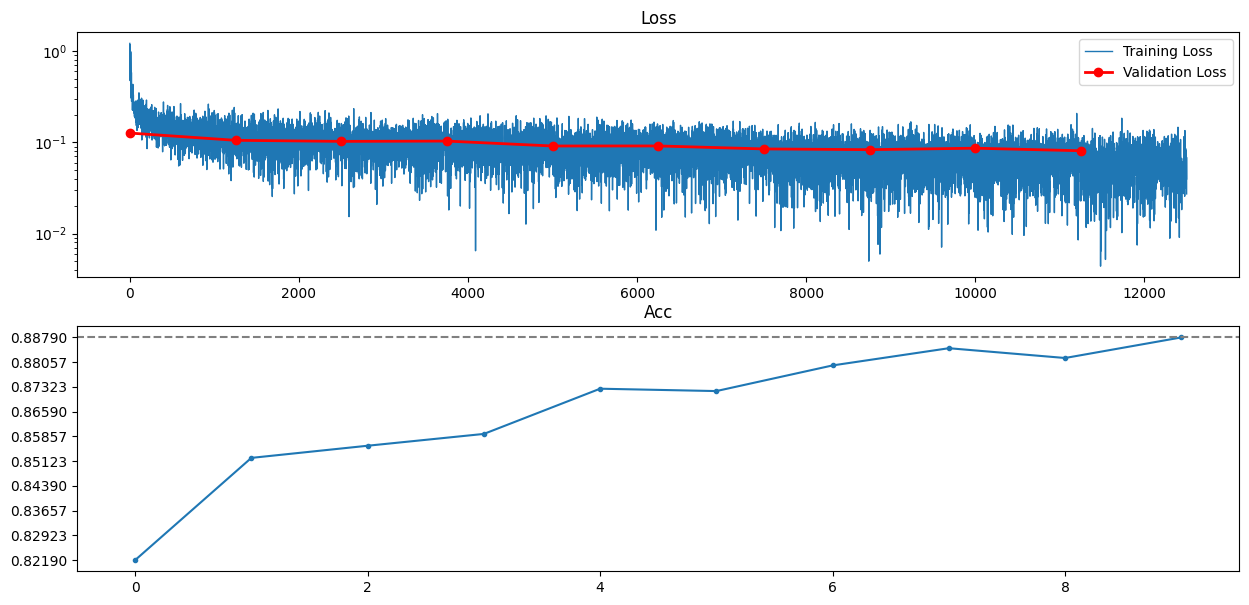

In [201]:
print(result.keys())
plotter(result, True)

# Hyperparameter Seaching

Search for the best hyperparamters with varing hidden sizes, learning rates and regularizations.

To shorten the waiting time, here I have used reduced parameters for display. In practice, one could set larger epochs and use larger search range.

In [164]:
hidden_sizes = [50, 100, 200, 500, 600, 700, 800, 1000]
epochs = 5
accuracies = []
best = 0
best_acc = 0
for hidden_size in hidden_sizes:
    print(f'Training hidden size = {hidden_size}')
    sleep(0.25)
    np.random.seed(2024)
    nn = Network([784,hidden_size,10],['relu','sigmoid'], lr = 3e-3)
    result2 = nn.fit(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = hidden_size
    clear_output(wait = True)
    
print('All acc =', accuracies)
print('Best Size =', best, '\nBest Acc =', best_acc)

All acc = [0.8566, 0.8602, 0.87, 0.8802, 0.8761, 0.8812, 0.8834, 0.8859]
Best Size = 1000 
Best Acc = 0.8859


In [165]:
lrs = [3, 3e-1, 3e-2, 3e-3, 3e-4, 3e-5]
epochs = 5
accuracies = []
best = 0
best_acc = 0
for lr in lrs:
    print(f'Training learning rate = {lr}')
    sleep(0.25)
    np.random.seed(2024)
    nn = Network([784,600,10],['relu','sigmoid'], lr = lr)
    result2 = nn.fit(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = lr
    clear_output(wait = True)

print('All acc =', accuracies)
print('Best Lr =', best, '\nBest Acc =', best_acc)

All acc = [0.0996, 0.0996, 0.9, 0.8761, 0.8388, 0.7435]
Best Lr = 0.03 
Best Acc = 0.9


In [166]:
regs = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 0]
epochs = 5
accuracies = []
best = 0
best_acc = 0
for reg in regs:
    print(f'Training regularization = {reg}')
    sleep(0.25)
    np.random.seed(2024)
    nn = Network([784,600,10],['relu','sigmoid'], lr = 3e-2, regws=[reg,reg])
    result2 = nn.fit(data_x, data_y, epochs, 40, 'MSE', valid_x, valid_y, 1)
    accuracies.append(result2['acc'][-1])
    if result2['acc'][-1] > best_acc:
        best_acc = result2['acc'][-1]
        best = reg
    clear_output(wait = True)
    
print('All acc =', accuracies)
print('Best Reg =', best, '\nBest Acc =', best_acc)

All acc = [0.6174, 0.8183, 0.8883, 0.8979, 0.8986, 0.9006, 0.9]
Best Reg = 1e-07 
Best Acc = 0.9006


# Validation

Validate our model on the training data, validation data and the testing data.

In [167]:
# load your model
nn = Network.load(r'mymodel.txt')

In [168]:
from time import sleep 
print('-'*30 + '\nAccuracy on Training Data')
sleep(0.25)
nn.predict(data_x, data_y)
print('-'*30 + '\nAccuracy on Validation Data')
sleep(0.25)
#nn.predict(validation_data[0], np.eye(10)[validation_data[1]])
nn.predict(valid_x, valid_y)
print('-'*30 + '\nAccuracy on Testing Data')
sleep(0.25)
#nn.predict(test_data[0], np.eye(10)[test_data[1]])
nn.predict(test_x, test_y)
print(end = '')

------------------------------
Accuracy on Training Data


100%|██████████| 1500/1500 [00:01<00:00, 1181.61it/s]


Acc = 54924/60000 = 91.54%
------------------------------
Accuracy on Validation Data


100%|██████████| 250/250 [00:00<00:00, 1138.76it/s]


Acc = 8879/10000 = 88.79%
------------------------------
Accuracy on Testing Data


100%|██████████| 250/250 [00:00<00:00, 1141.35it/s]

Acc = 8833/10000 = 88.33%


In [174]:
def extract_failure(nn, x, y):
    pred = nn.predict(x)
    print(pred)
    failure = np.where(y != pred)
    return failure[0], pred[failure[0]], y[failure[0]]

nn = Network.load(r'mymodel.txt')
test_data = [test_x, test_y1]  # try out training_data / validation_data / test_data
failure = extract_failure(nn, data_x, data_y1)
print(failure[0]) # failed indices

100%|██████████| 1500/1500 [00:01<00:00, 1086.07it/s]

[9 0 0 ... 3 0 5]
[    7    24    32 ... 59968 59974 59981]


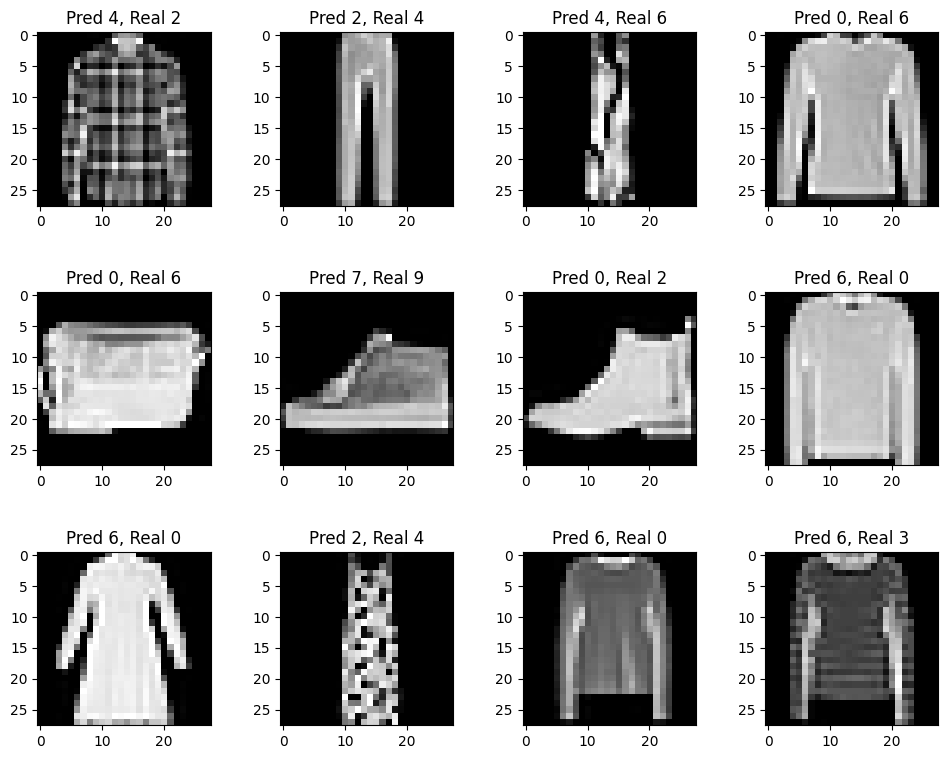

In [175]:
# a visualization of the failed cases
plt.figure(figsize=(12,9))
n = min(failure[0].size, 4)
m , n = min(failure[0].size // n, 3), n
for i in range(m):
    for j in range(n):
        k = i*n+j
        plt.subplot(m,n,k+1)
        plt.imshow(test_x[failure[0][k]].reshape((28,28)), cmap='gray')
        plt.title(f'Pred {failure[1][k]}, Real {failure[2][k]}')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [171]:
# control group without training
np.random.seed(2024)
nn0 = Network([784,500,10],['relu','sigmoid'], lr = 3e-2)

# control group with only 1 epoch
np.random.seed(2024)
nn1 = Network([784,500,10],['relu','sigmoid'], lr = 3e-2)
result1 = nn1.fit(data_x, data_y, epochs = 1, batch_size = 40, loss_func = 'MSE', 
                valid_x = valid_x, valid_y = valid_y, valid_freq = 1)
print(result1['acc'])

100%|██████████| 1500/1500 [00:12<00:00, 121.14it/s]


[0.8375]


# Visualization of parameters

In [172]:
# load your model
nn = Network.load(r'mymodel.txt')

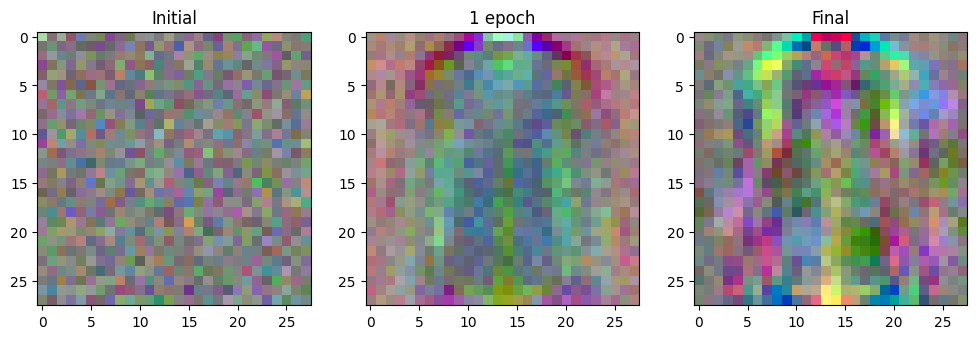

In [173]:
from PCA import nnPCA   

plt.figure(figsize=(12, 9))
names = ['Initial', '1 epoch', 'Final']
for i, network in enumerate([nn0, nn1, nn]):
    plt.subplot(1, 3, i+1)
    plt.imshow(nnPCA(network, affine=False))
    plt.title(names[i])
plt.show()
